<a href="https://colab.research.google.com/github/metaute73/Proyecto-Gen-mica-2024-2/blob/main/Exploratory_analysis_LengthDepth_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

df = pd.read_csv('LengthDepth_15.csv', delimiter="\t")
df.head()

,Scaffold,Length,GC,Depth,AltAllels
0,Contig_1_192.292,92398.0,0.513994,192.292,0
1,Contig_2_327.489,383.0,0.511749,327.489,16
2,Contig_3_237.947,312762.0,0.537991,237.947,11
3,Contig_4_230.195,112795.0,0.527036,230.195,10
4,Contig_5_360.228,506.0,0.632411,360.228,0


In [7]:
df.shape

(43, 5)

In [8]:
df.dtypes

,0
Scaffold,object
Length,float64
GC,float64
Depth,float64
AltAllels,int64


In [9]:
df.describe()

,Length,GC,Depth,AltAllels
count,43.000000,43.000000,43.000000,43.000000
mean,102471.581395,0.527587,268.965630,1.744186
std,126189.913687,0.050301,237.274504,3.579658
min,332.000000,0.341667,30.885400,0.000000
25%,2166.000000,0.515782,198.383500,0.000000
50%,43099.000000,0.526983,219.392000,0.000000
75%,146072.000000,0.539729,241.654000,1.000000
max,509308.000000,0.632411,1326.460000,16.000000


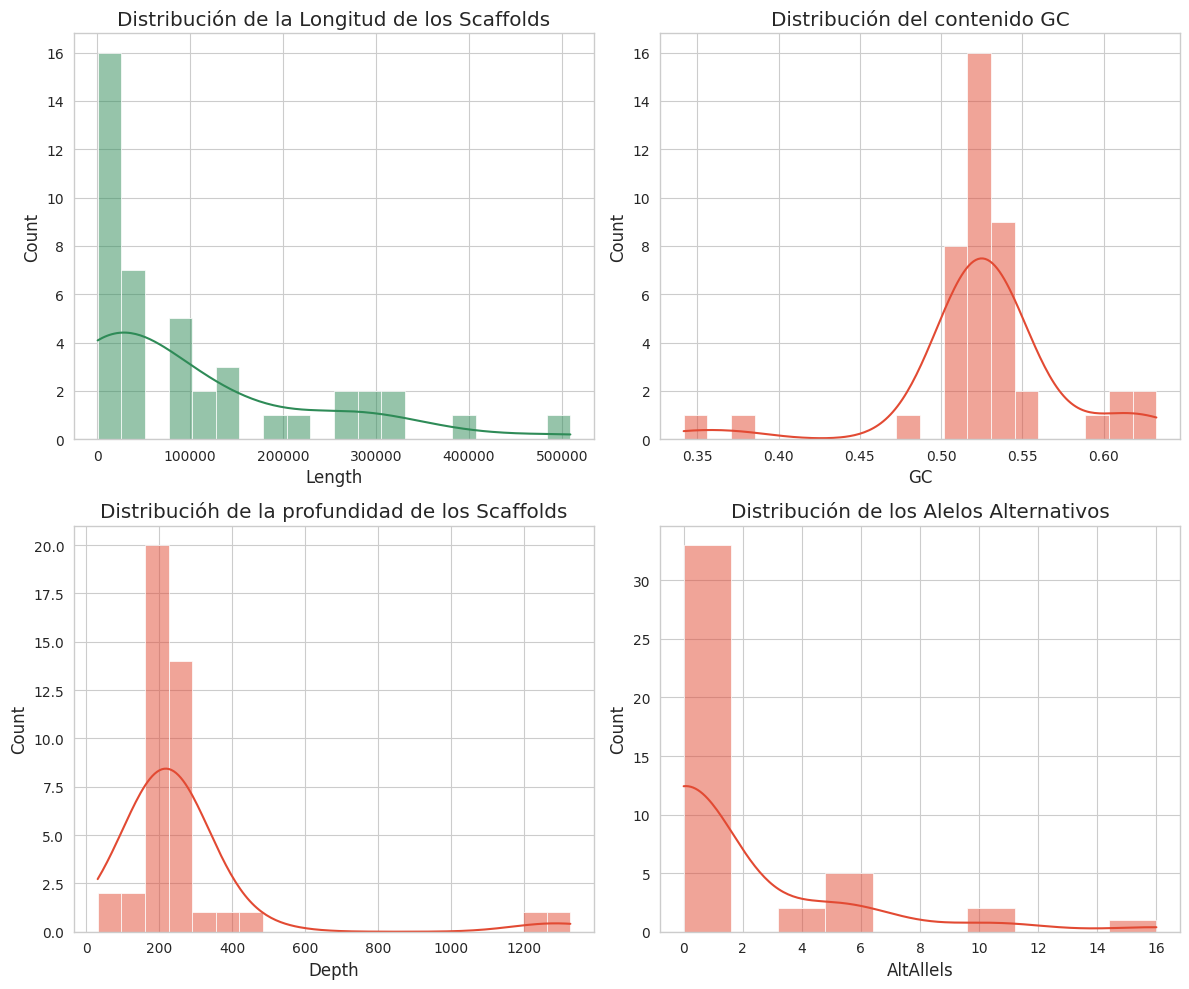

In [11]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df["Length"], bins=20, kde=True, color="seagreen",ax=axes[0, 0])
axes[0, 0].set_title("Distribución de la Longitud de los Scaffolds")

sns.histplot(df["GC"], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribución del contenido GC")

sns.histplot(df["Depth"], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribucióh de la profundidad de los Scaffolds")

sns.histplot(df["AltAllels"], bins=10, kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribución de los Alelos Alternativos")

plt.tight_layout()
plt.show()


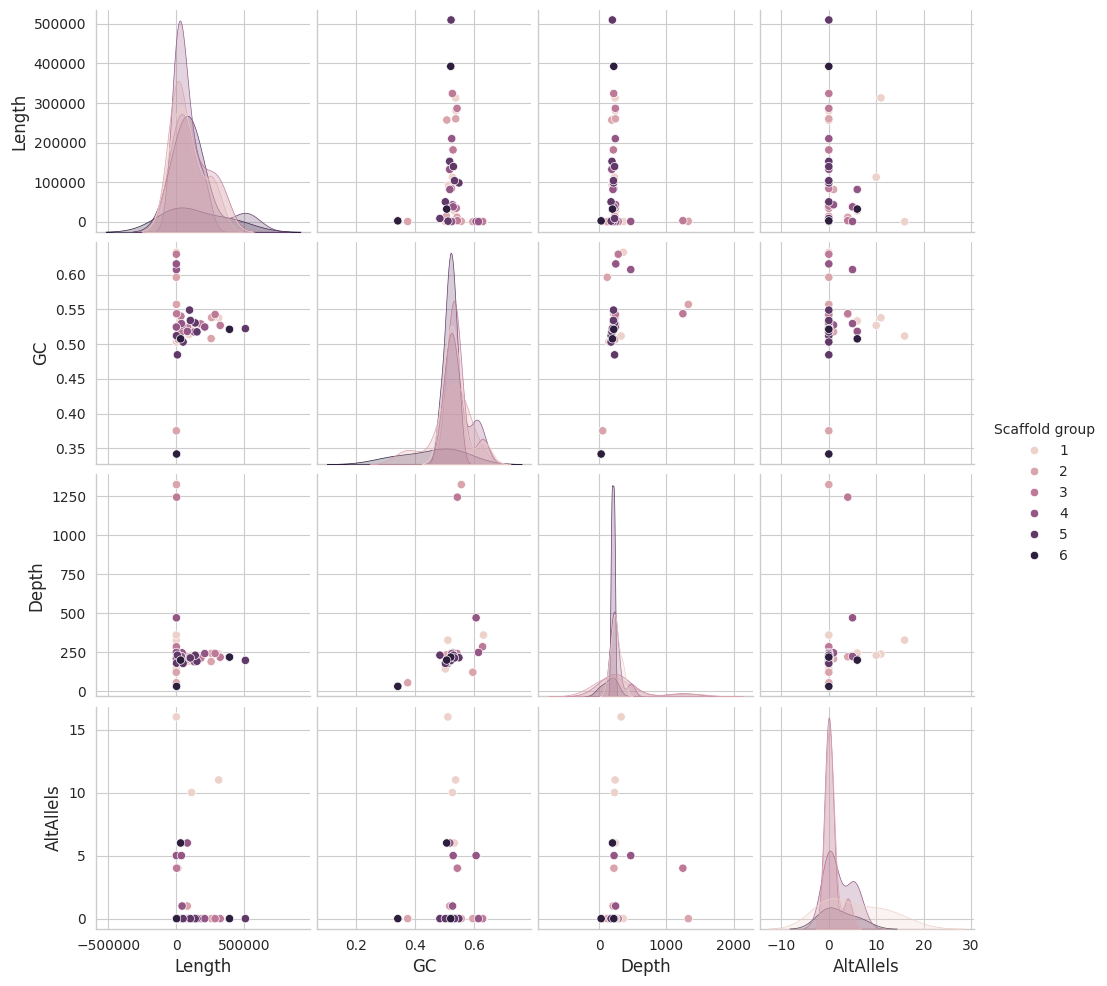

In [12]:
df['Scaffold group'] = np.repeat(range(1, 7), np.ceil(len(df) / 6))[:len(df)]
g = sns.pairplot(df, diag_kind="kde", vars=['Length','GC', 'Depth', 'AltAllels'],
                 hue='Scaffold group')
#g._legend.remove()
plt.show()


In [13]:
df_corr = df[['Length','GC', 'Depth', 'AltAllels']].dropna().corr()
df_corr

,Length,GC,Depth,AltAllels
Length,1.000000,-0.007760,-0.172652,-0.099372
GC,-0.007760,1.000000,0.303221,0.032013
Depth,-0.172652,0.303221,1.000000,0.103146
AltAllels,-0.099372,0.032013,0.103146,1.000000


<Axes: >

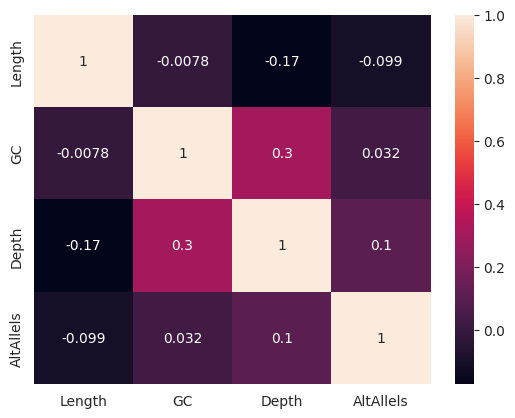

In [14]:
sns.heatmap(df_corr, annot = True)

In [15]:

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter_3d(df, x="Length", y="Depth", z="AltAllels",
                    size='GC', color = 'Scaffold group')
fig.show()

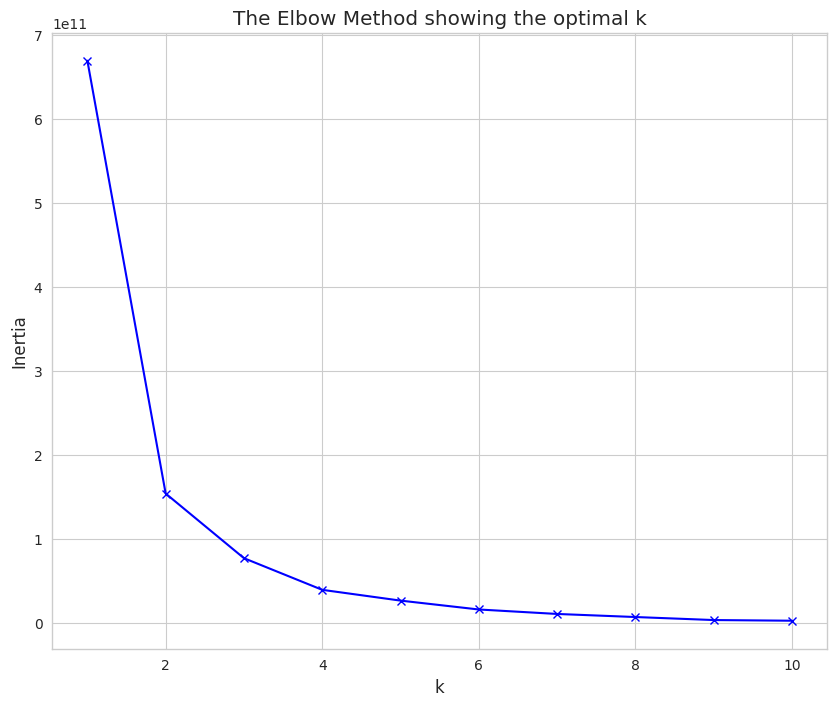

In [16]:
from sklearn.cluster import KMeans


def elbow_curve(data, maxClusters = 15):

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(df[['Length','GC', 'Depth', 'AltAllels']].dropna())
    inertias.append(kmeanModel.inertia_)

  # Grafico de los resultados obtenidos para cada valor del rango

  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

elbow_curve(df, maxClusters = 10)